In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
hotel = pd.read_csv("/content/tripadvisor_hotel_reviews.csv")

In [ ]:
hotel

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


# ***Preprocessing***

In [ ]:
hotel.isnull().sum(),hotel.duplicated().sum()

(Review    0
 Rating    0
 dtype: int64,
 0)

In [ ]:
X = hotel['Review']
y = hotel['Rating']

In [ ]:
y.value_counts()

,count
Rating,
5,9054
4,6039
3,2184
2,1793
1,1421


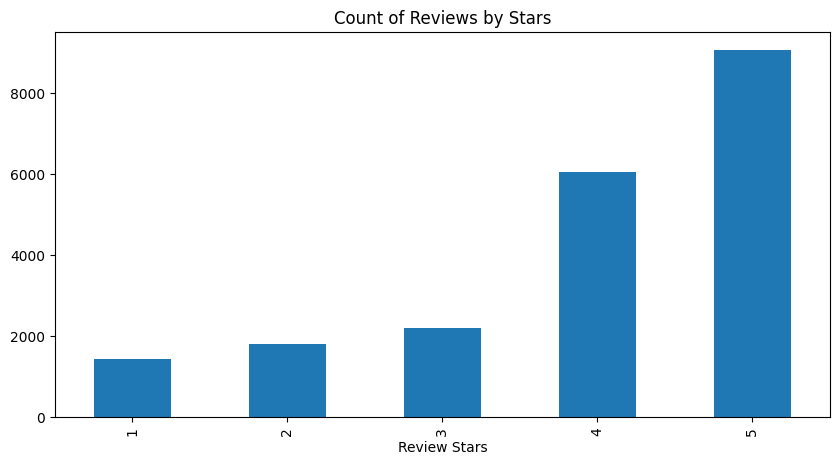

In [ ]:
ax = y.value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

## *Cleaning Reviews*

In [22]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Advanced Text Cleaning Function
def clean_text(text):
    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # 3. Remove mentions (@username) and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)

    # 4. Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-z\s]', '', text)

    # 5. Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()


    # 6. Remove stopwords
    # tokens = [word for word in text if word not in stop_words]

    # . Rejoin tokens into a single string
    cleaned_text = ' '.join(text)

    return cleaned_text

# Apply the cleaning function to the DataFrame
hotel['cleaned_text'] = hotel['Review'].apply(clean_text)

# Output the cleaned DataFrame
print(hotel[['Review', 'cleaned_text']])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                  Review  \
0      nice hotel expensive parking got good deal sta...   
1      ok nothing special charge diamond member hilto...   
2      nice rooms not 4* experience hotel monaco seat...   
3      unique, great stay, wonderful time hotel monac...   
4      great stay great stay, went seahawk game aweso...   
...                                                  ...   
20486  best kept secret 3rd time staying charm, not 5...   
20487  great location price view hotel great quick pl...   
20488  ok just looks nice modern outside, desk staff ...   
20489  hotel theft ruined vacation hotel opened sept ...   
20490  people talking, ca n't believe excellent ratin...   

                                            cleaned_text  
0      n i c e   h o t e l   e x p e n s i v e   p a ...  
1      o k   n o t h i n g   s p e c i a l   c h a r ...  
2      n i c e   r o o m s   n o t   e x p e r i e n ...  
3      u n i q u e   g r e a t   s t a y   

In [23]:
hotel

,Review,Rating,cleaned_text
0,nice hotel expensive parking got good deal sta...,4,n i c e h o t e l e x p e n s i v e p a ...
1,ok nothing special charge diamond member hilto...,2,o k n o t h i n g s p e c i a l c h a r ...
2,nice rooms not 4* experience hotel monaco seat...,3,n i c e r o o m s n o t e x p e r i e n ...
3,"unique, great stay, wonderful time hotel monac...",5,u n i q u e g r e a t s t a y w o n d e ...
4,"great stay great stay, went seahawk game aweso...",5,g r e a t s t a y g r e a t s t a y w ...
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,b e s t k e p t s e c r e t r d t i m ...
20487,great location price view hotel great quick pl...,4,g r e a t l o c a t i o n p r i c e v i ...
20488,"ok just looks nice modern outside, desk staff ...",2,o k j u s t l o o k s n i c e m o d e ...
20489,hotel theft ruined vacation hotel opened sept ...,1,h o t e l t h e f t r u i n e d v a c a ...


## *Solve noisy Reviews*

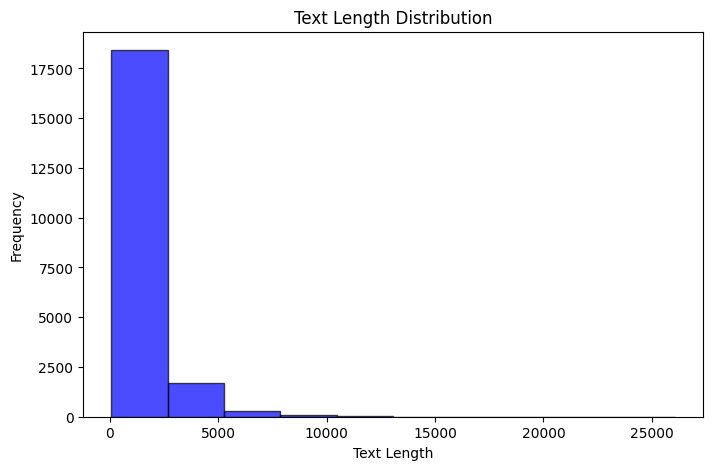

Original Dataset:
                                                  Review  Rating  \
0      nice hotel expensive parking got good deal sta...       4   
1      ok nothing special charge diamond member hilto...       2   
2      nice rooms not 4* experience hotel monaco seat...       3   
3      unique, great stay, wonderful time hotel monac...       5   
4      great stay great stay, went seahawk game aweso...       5   
...                                                  ...     ...   
20486  best kept secret 3rd time staying charm, not 5...       5   
20487  great location price view hotel great quick pl...       4   
20488  ok just looks nice modern outside, desk staff ...       2   
20489  hotel theft ruined vacation hotel opened sept ...       1   
20490  people talking, ca n't believe excellent ratin...       2   

                                            cleaned_text  text_length  
0      n i c e   h o t e l   e x p e n s i v e   p a ...         1151  
1      o k   n o t h 

In [24]:
# Step 1: Calculate Text Length
hotel['text_length'] = hotel["cleaned_text"].apply(len)

# Step 2: Visualize Text Length Distribution
plt.figure(figsize=(8, 5))
plt.hist(hotel["text_length"], bins=10, color='blue', alpha=0.7, edgecolor='black')
plt.title("Text Length Distribution")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

# Step 3: Define Outlier Thresholds
# Based on domain knowledge or visualization, set thresholds.
min_length = 5    # Minimum acceptable length
max_length = 7500  # Maximum acceptable length

# Step 4: Filter Out Outliers
filtered_hotel = hotel[(hotel["text_length"] >= min_length) & (hotel["text_length"] <= max_length)]

# Display Results
print("Original Dataset:")
print(hotel)
print("\nFiltered Dataset:")
print(filtered_hotel)


In [25]:
from tensorflow.keras.layers import TextVectorization

In [26]:
X = filtered_hotel["cleaned_text"]
y = filtered_hotel["Rating"]

In [27]:
MAX_FEATURES = 100000 # number of words in the vocab

In [28]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [29]:
vectorizer.adapt(X.values)

In [30]:
vectorized_text = vectorizer(X.values)

In [31]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [32]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [33]:
train,val, test

(<_TakeDataset element_spec=(TensorSpec(shape=(None, 1800), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_TakeDataset element_spec=(TensorSpec(shape=(None, 1800), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_TakeDataset element_spec=(TensorSpec(shape=(None, 1800), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

# ***Neural network model***

In [61]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import GlobalAveragePooling1D

In [102]:
# prompt: create neural network model for this project or dataset please

model = Sequential()
model.add(Embedding(MAX_FEATURES+1, 32,  input_shape=(1800,)))
model.add(Bidirectional(LSTM(32, activation='tanh')))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax')) # 6 output units for 6 rating categories

In [103]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [104]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)             │ (None, 1800, 32)            │       3,200,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_14 (Bidirectional)     │ (None, 64)                  │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,291,686 (12.56 MB)

 Trainable params: 3,291,686 (12.56 MB)

 Non-trainable params: 0 (0.00 B)

In [105]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [109]:
history = model.fit(train, epochs=50, validation_data=val, callbacks=[early_stopping])

Epoch 1/50
890/890 ━━━━━━━━━━━━━━━━━━━━ 93s 104ms/step - accuracy: 0.6224 - loss: 0.8894 - val_accuracy: 0.6344 - val_loss: 0.8474
Epoch 2/50
890/890 ━━━━━━━━━━━━━━━━━━━━ 140s 102ms/step - accuracy: 0.6363 - loss: 0.8739 - val_accuracy: 0.6356 - val_loss: 0.8655
Epoch 3/50
890/890 ━━━━━━━━━━━━━━━━━━━━ 142s 103ms/step - accuracy: 0.6317 - loss: 0.8666 - val_accuracy: 0.6415 - val_loss: 0.8394
Epoch 4/50
890/890 ━━━━━━━━━━━━━━━━━━━━ 91s 102ms/step - accuracy: 0.6425 - loss: 0.8500 - val_accuracy: 0.6309 - val_loss: 0.8791
Epoch 5/50
890/890 ━━━━━━━━━━━━━━━━━━━━ 92s 103ms/step - accuracy: 0.6399 - loss: 0.8495 - val_accuracy: 0.6415 - val_loss: 0.8619
Epoch 6/50
890/890 ━━━━━━━━━━━━━━━━━━━━ 142s 103ms/step - accuracy: 0.6428 - loss: 0.8489 - val_accuracy: 0.6326 - val_loss: 0.8693


neural network was running with 20 epochs before these 50 epochs
and it was done by early stopping  


<Figure size 800x500 with 0 Axes>

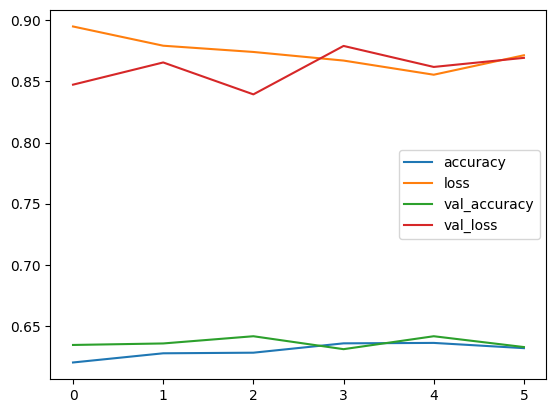

In [110]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

## *Its done*